In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-passengers/AirPassengers.csv


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA

In [42]:
data=pd.read_csv('/kaggle/input/air-passengers/AirPassengers.csv')
data['Month']=pd.to_datetime(data['Month'],infer_datetime_format=True)
df=data.set_index(['Month'])
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [24]:
df.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


# visualizing the data

Text(0.5, 1.0, 'Number of passengers by date ')

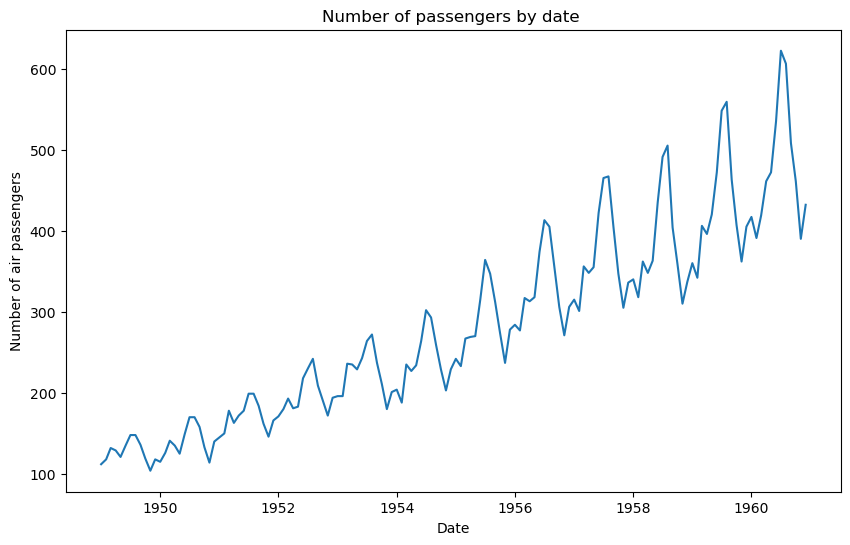

In [25]:
plt.plot(df)
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.title('Number of passengers by date ')

as we see the date is not stationarity because it has a trend

# rolling statistics every 12 month

In [43]:
rol_mean=df.rolling(window=12).mean()
rol_std=df.rolling(window=12).std()
print(rol_mean,rol_std)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


the mean is not the same all over the data and variation too.

# plot the rolling

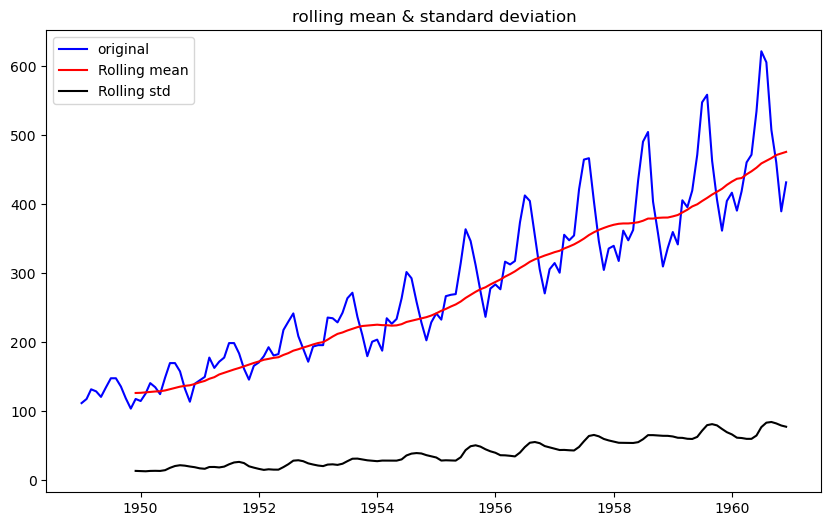

In [27]:
orig=plt.plot(df,color='blue',label='original')
mean=plt.plot(rol_mean,color='red',label='Rolling mean')
std=plt.plot(rol_std,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('rolling mean & standard deviation')
plt.show(block=False)

the mean and standard deviation are not conistant so the data is not stationarity

# Dickey-Fuller Test

In [28]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey Fuller Test:')
dftest=adfuller(df['#Passengers'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','Lags used','Number of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical value(%s)'%key]=value
print(dfoutput)


Results of Dickey Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
Lags used                       13.000000
Number of observations used    130.000000
Critical value(1%)              -3.481682
Critical value(5%)              -2.884042
Critical value(10%)             -2.578770
dtype: float64


from dickey fuller test and p-value we can accept the null hypothesis (H0:data is not stationarity)
we can say that the data is not stationarity

# estimating trend

# converting the data to stationarity

# take log for the data

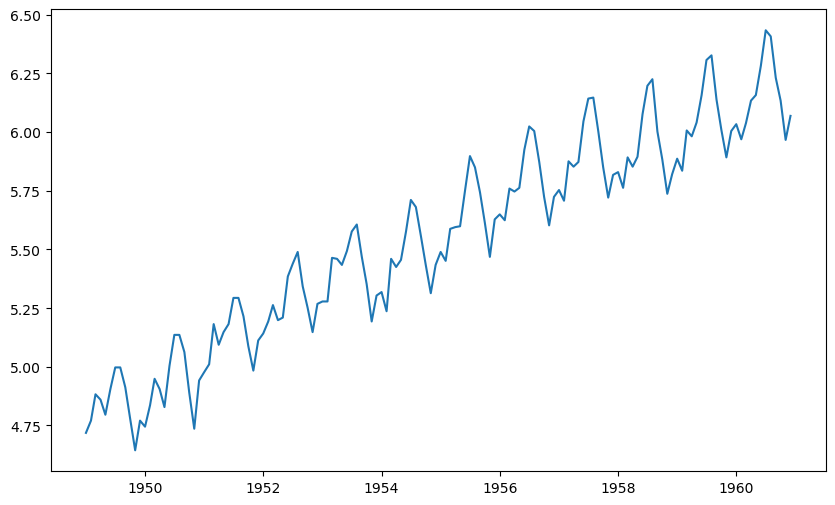

In [29]:
df_logscale=np.log(df)
plt.plot(df_logscale)

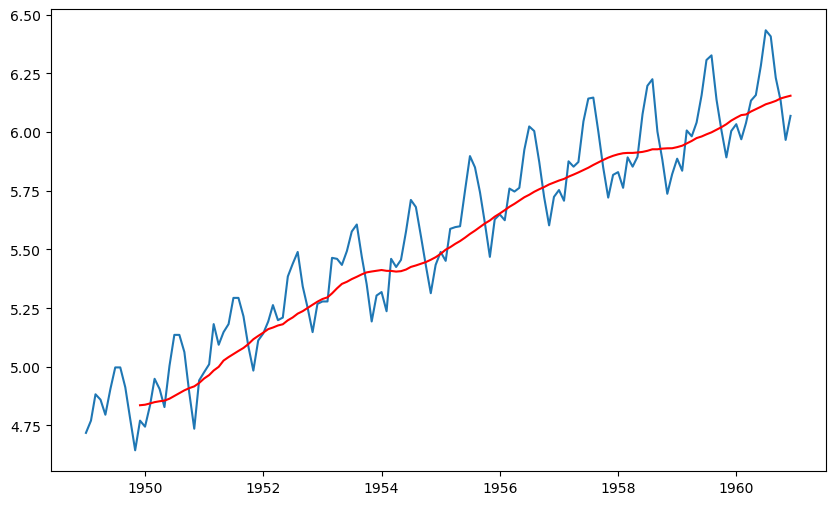

In [30]:
movingaverage=df_logscale.rolling(window=12).mean()
movingstd=df_logscale.rolling(window=12).std()
plt.plot(df_logscale)
plt.plot(movingaverage,color='red')

# take the difference between log and moving average 

In [31]:
df_logscale_minus_movingaverage=df_logscale-movingaverage
df_logscale_minus_movingaverage.dropna(inplace=True)
df_logscale_minus_movingaverage.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


# dickey fuller test to see if the data stationarity or not

In [32]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #determine rolling statistics
    movingaverage=timeseries.rolling(window=12).mean()
    movingstd=timeseries.rolling(window=12).std()
    #plot rolling statistics
    orig=plt.plot(timeseries,color='blue',label='original')
    mean=plt.plot(movingaverage,color='red',label='Rolling mean')
    std=plt.plot(movingstd,color='black',label='Rolling std')
    plt.legend(loc='best')
    plt.title('rolling mean & standard deviation')
    plt.show(block=False)
    #perform dickey fuller test
    print('Results of Dickey Fuller Test:')
    dftest=adfuller(timeseries['#Passengers'],autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','Lags used','Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value(%s)'%key]=value
    print(dfoutput)

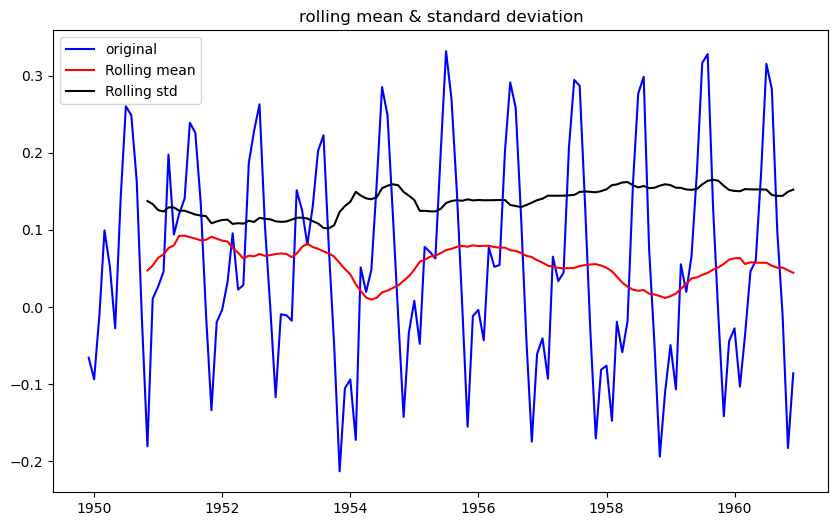

Results of Dickey Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
Lags used                       13.000000
Number of observations used    119.000000
Critical value(1%)              -3.486535
Critical value(5%)              -2.886151
Critical value(10%)             -2.579896
dtype: float64


In [33]:
test_stationarity(df_logscale_minus_movingaverage)

the mean and standard deviation are  conistant so the data is  stationarity and there is no trend.
from dickey fuller test and p-value we can reject the null hypothesis (H0:data is not stationarity)
we can say that the data is  stationarity

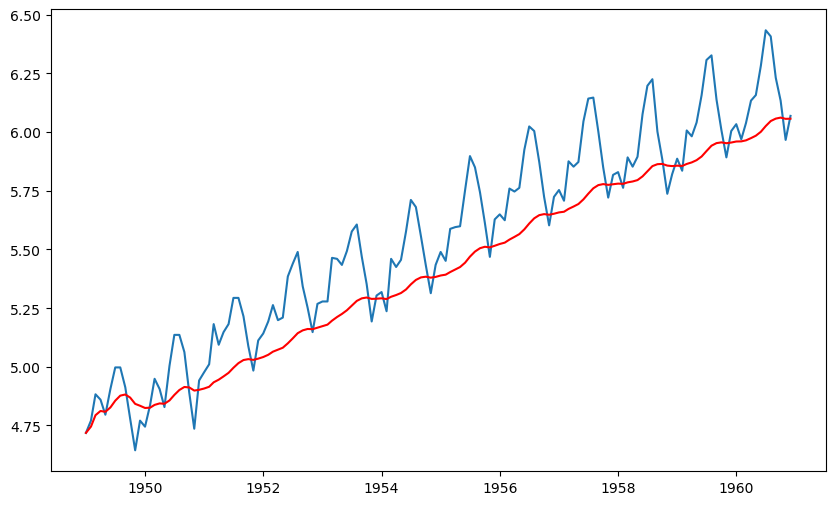

In [34]:
exponentialdecayweightedaverage=df_logscale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(df_logscale)
plt.plot(exponentialdecayweightedaverage,color='red')

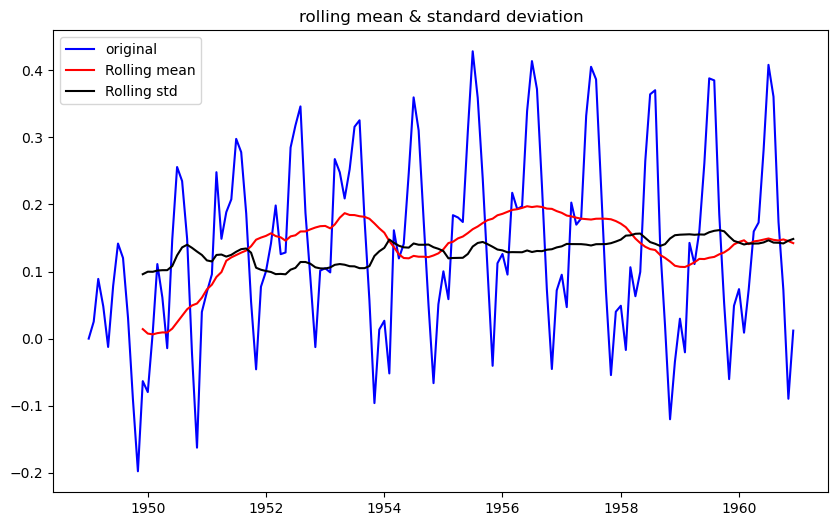

Results of Dickey Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
Lags used                       13.000000
Number of observations used    130.000000
Critical value(1%)              -3.481682
Critical value(5%)              -2.884042
Critical value(10%)             -2.578770
dtype: float64


In [35]:
df_logscale_minus_movingexponentialdecayweightedaverage=df_logscale-exponentialdecayweightedaverage
test_stationarity(df_logscale_minus_movingexponentialdecayweightedaverage)

the mean and standard deviation are almost conistant so the data is  stationarity and there is no trend.
from dickey fuller test and p-value we can reject the null hypothesis (H0:data is not stationarity)
we can say that the data is  stationarity

# shifting the data for forecasting

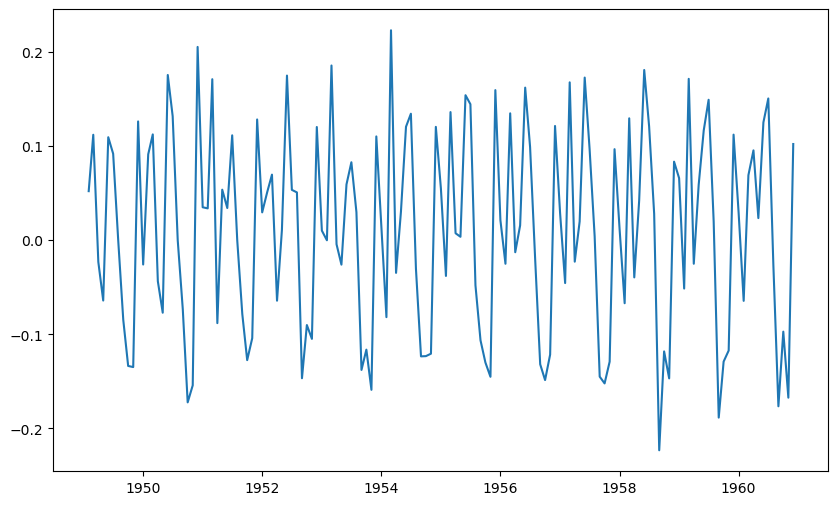

In [36]:
df_log_diff_shifting=df_logscale-df_logscale.shift()
plt.plot(df_log_diff_shifting)

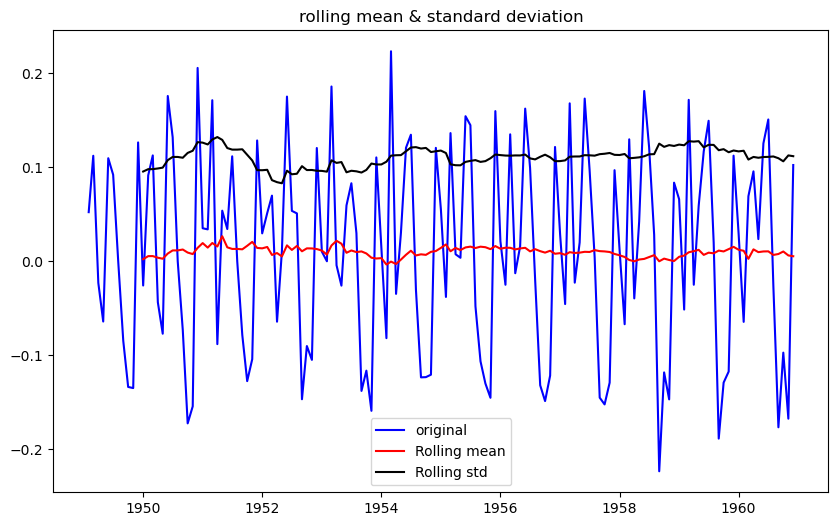

Results of Dickey Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
Lags used                       14.000000
Number of observations used    128.000000
Critical value(1%)              -3.482501
Critical value(5%)              -2.884398
Critical value(10%)             -2.578960
dtype: float64


In [37]:
df_log_diff_shifting.dropna(inplace=True)
test_stationarity(df_log_diff_shifting)

the mean and variation is constant and no trend so the data is stationarity

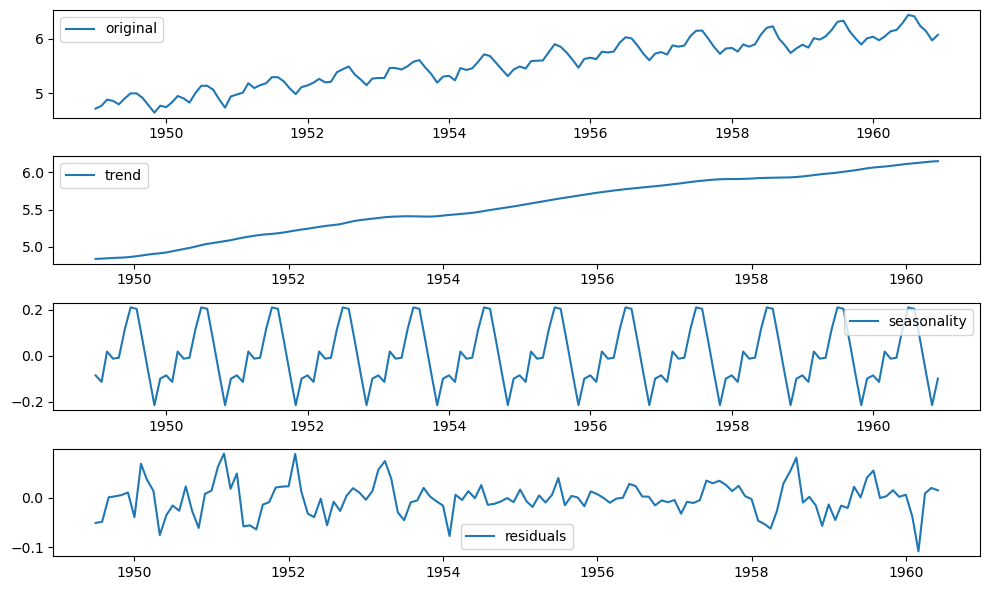

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(df_logscale)
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
plt.subplot(411)
plt.plot(df_logscale,label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='residuals')
plt.legend(loc='best')
plt.tight_layout()

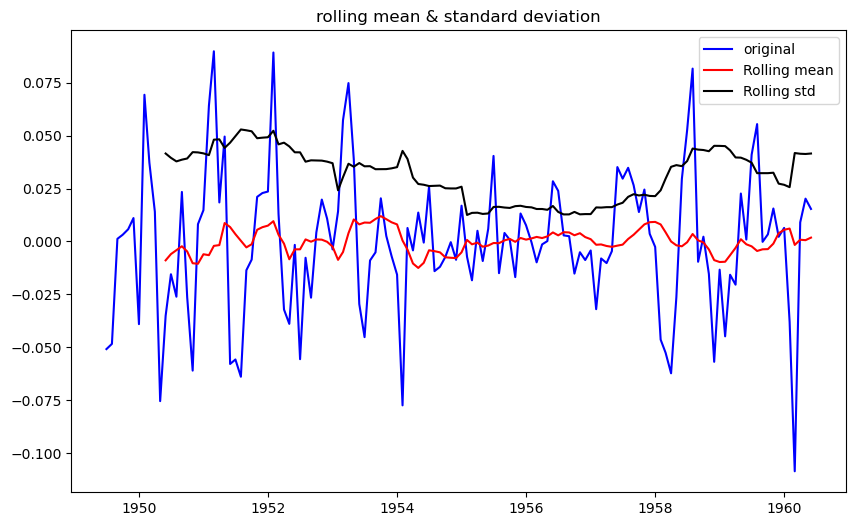

Results of Dickey Fuller Test:


KeyError: '#Passengers'

In [39]:
decomposedlogdata=residual
decomposedlogdata.dropna(inplace=True)
test_stationarity(decomposedlogdata)

# ACF and PACF plots

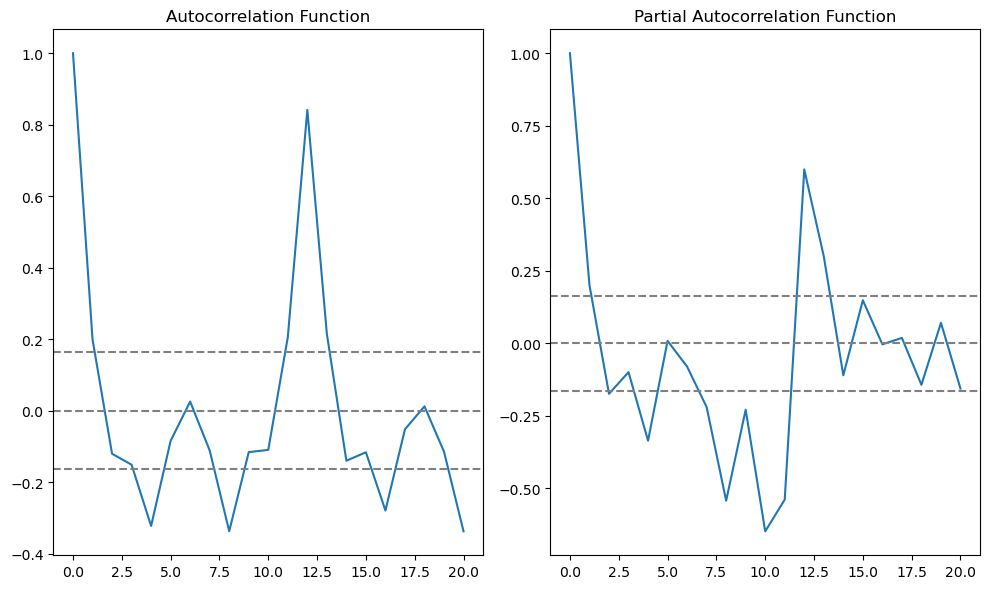

In [44]:
from statsmodels.tsa.stattools import acf,pacf
log_acf=acf(df_log_diff_shifting,nlags=20)
log_pacf=pacf(df_log_diff_shifting,nlags=20,method='ols')
#plot acf
plt.subplot(121)
plt.plot(log_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff_shifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff_shifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#plot pacf
plt.subplot(122)
plt.plot(log_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff_shifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff_shifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

From the ACF graph, we see that curve touches y=0.0 line at x=2. Thus, from theory, Q = 2 From the PACF graph, we see that curve touches y=0.0 line at x=2. Thus, from theory, P = 2

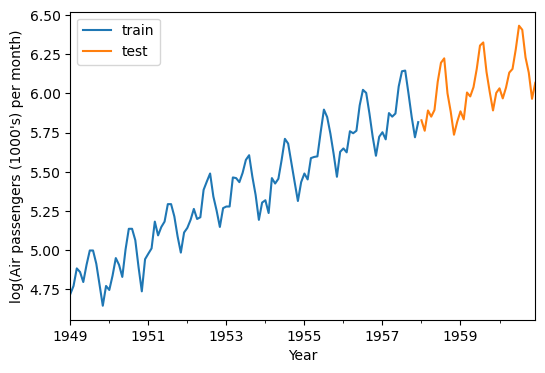

In [45]:
df_train = df_logscale.loc[:'1957']
df_test = df_logscale.loc['1958':]
fig, ax = plt.subplots(figsize=(6,4))
df_train.plot(ax=ax)
df_test.plot(ax=ax)

plt.xlabel('Year')
plt.ylabel("log(Air passengers (1000's) per month)")
plt.legend(['train','test']);

# plot SARIMA model

In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Create a SARIMA model
model = SARIMAX(df_train, order=(2,1,2), seasonal_order=(0,1,2,12))

# Fit the model
results = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.50259D+00    |proj g|=  8.09917D-01


 This problem is unconstrained.



At iterate    5    f= -1.57523D+00    |proj g|=  5.68879D+00

At iterate   10    f= -1.63479D+00    |proj g|=  3.26726D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     12     29      1     0     0   6.430D-03  -1.635D+00
  F =  -1.6347917546567066     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [47]:
# Print the results summary
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        #Passengers   No. Observations:                  108
Model:             SARIMAX(2, 1, 2)x(0, 1, 2, 12)   Log Likelihood                 176.558
Date:                            Wed, 22 Feb 2023   AIC                           -339.115
Time:                                    08:29:51   BIC                           -321.238
Sample:                                01-01-1949   HQIC                          -331.891
                                     - 12-01-1957                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1417      0.864     -0.164      0.870      -1.836       1.553
ar.L2          0.3214      0.284   

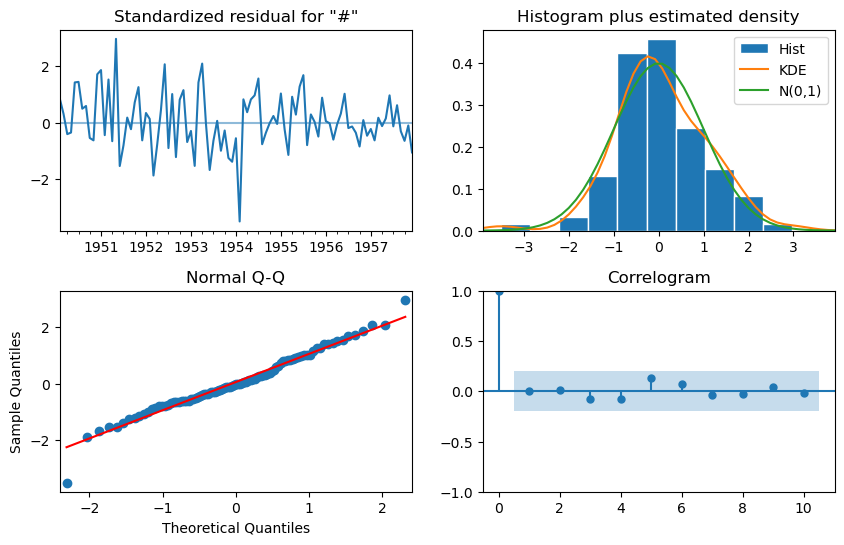

In [48]:
results.plot_diagnostics(figsize=(10,6))
plt.subplots_adjust(hspace=0.3);

#  SARIMA forecast


In [49]:
model = SARIMAX(df, order=(2,1,2), seasonal_order=(0,1,2,12))

# Fit the model
results = model.fit()

# Generate predictions
one_step_forecast = results.get_prediction(start=-36)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower air_passengers']
upper_limits = confidence_intervals.loc[:,'upper air_passengers']
# Print best estimate predictions and confidence intervals
print(mean_forecast[:3],'\n')
print(confidence_intervals[:3])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.51680D+00    |proj g|=  9.40590D-02


 This problem is unconstrained.



At iterate    5    f=  3.50570D+00    |proj g|=  1.31929D-02

At iterate   10    f=  3.50121D+00    |proj g|=  7.00754D-03

At iterate   15    f=  3.49617D+00    |proj g|=  1.92250D-02

At iterate   20    f=  3.49315D+00    |proj g|=  2.33500D-02

At iterate   25    f=  3.49233D+00    |proj g|=  9.37706D-04

At iterate   30    f=  3.49233D+00    |proj g|=  7.58506D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     35      1     0     0   3.636D-05   3.492D+00
  F =   3.4923287545701607     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


KeyError: 'lower air_passengers'

NameError: name 'lower_limits' is not defined

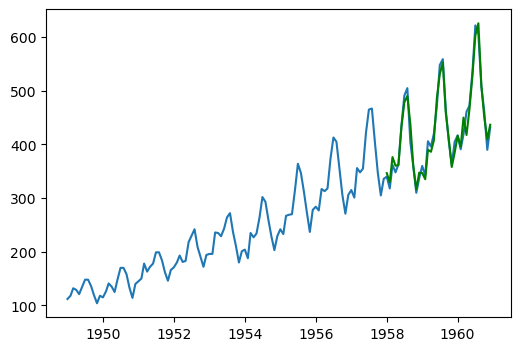

In [50]:
plt.figure(figsize=(6,4))

# Plot air passenger data
plt.plot(df.index, df, label='observed')

# Plot mean predictions as line
plt.plot(mean_forecast.index, mean_forecast, color='g', label='predicted')

# Shade area between confidence limits
plt.fill_between(lower_limits.index, lower_limits, upper_limits, label='95% CI', color='pink')

# Set labels, etc.
plt.xlabel('Year')
plt.ylabel("Air passengers (1000's) per month")
plt.legend();

In [51]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, shuffle=False)
model_arima = ARIMA(train, order=(15,2,1))
model_fit = model_arima.fit()

<AxesSubplot:ylabel='Density'>

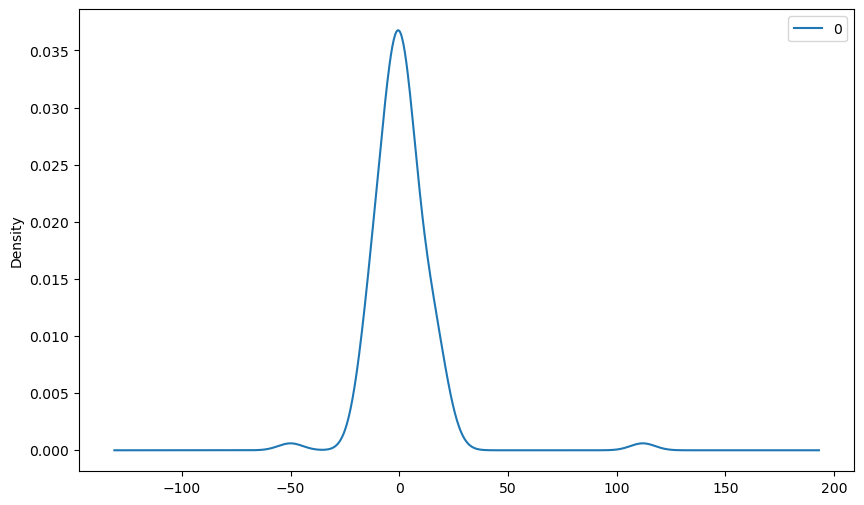

In [52]:
residual = pd.DataFrame(model_fit.resid)
residual.plot(kind="kde")

as we see the residuals peak close to zero so itis good to fit

# prediction values

In [56]:
preds = model_fit.predict(start='1959-10-01', end='1960-12-01')
preds.tail()

1960-08-01    548.831668
1960-09-01    504.123113
1960-10-01    447.510729
1960-11-01    423.945974
1960-12-01    445.972970
Freq: MS, Name: predicted_mean, dtype: float64

# actual values

In [55]:
df.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432
